## Importing the libraries

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import datetime


## SHM Model set up

In [2]:
#setting control variables
num_ts = 6000
# Set up and initialise all SHM related variables
#attributes such as catchment area and timestep (5min)in seconds set as dictionary
cat_attr = {"cat_area":55000000, "timestep": 300 }
#catchment paras in order - critical temp, melting factor, beta, sumax, threshold, kf, perc, kin,kb
cat_para = {"t_crit":0.7, "cat_dd":0.0001, "cat_beta":1.8, "cat_sumax":0.15,"cat_thresh":0.0016, "cat_kf":6,"cat_perc":0.25,"cat_ki":250,"cat_kb":40000}  
cat_flux = pd.DataFrame(columns=['cat_qsin', 'cat_qsout', 'cat_qspout','cat_qfin','cat_quin','cat_qfout','cat_quout','cat_et','cat_qiin','cat_qiout','cat_qbin','cat_qbout','cat_qout'], index=range(num_ts))
cat_state = pd.DataFrame(columns=['cat_ss','cat_sf','cat_su','cat_si','cat_sb'], index =range(num_ts))
cat_flux.iloc[0][:] = 0;  # initial flux
cat_state.iloc[0][:] = 0; # initial state
cat_state.cat_su[0] = 0.15   #initial state of unsaturated zone
cat_state.cat_sb [0] = 0.027 #initial state of baseflow reservoir

#Forcing and evidence data

In [3]:
data_filename = open("forcing_data.csv")
data_all = np.loadtxt(data_filename,delimiter = ',')
forcing_data = data_all[0:num_ts,:-1].transpose()
Observed_data = data_all [0:num_ts,-1].transpose()
base = datetime.datetime(2007, 1, 1,0,5,0)
Date_time_series = np.array([base + datetime.timedelta(minutes= 5*i) for i in range(0,num_ts)])
Date_time_series.shape

(6000,)

## Model Prediction

In [4]:
from shm.catchment_process import prediction  # importing the catchment process function
q = np.zeros((1,num_ts))
for t in range(1,num_ts):   #running the function in loops
  (q[0,t],cat_state.iloc[t][:], cat_flux.iloc[t][:]) = prediction(forcing_data[:,t],cat_state.iloc[t-1][:],cat_flux.iloc[t-1][:],cat_para,cat_attr )   # loop over all time-steps



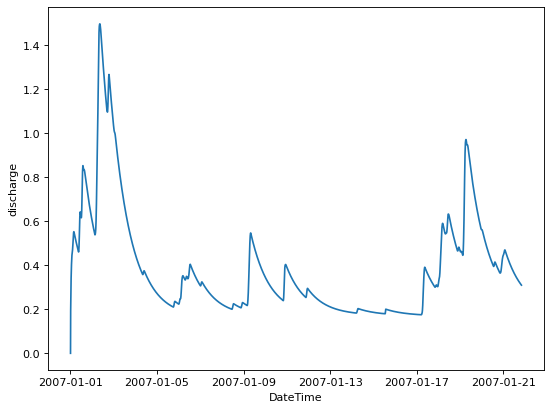

In [5]:
plt.figure(figsize=(8, 6), dpi=80)
#plt.plot(Date_time_series,cat_flux[12,:] )
plt.plot(Date_time_series,q.transpose())
plt.xlabel("DateTime")
plt.ylabel("discharge")
plt.show()